# 资产价格的基本统计分析
* 计算投资收益率，包括算术收益率，几何收益率
* 计算移动平均的均值，方差，偏度，峰度
* 可视化的方式观察正态性，肥尾特征

# QQ-Plot 绘制
* https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [1]:
#导入所需的库
import random
import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import probplot
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#导入价格数据
ETF_50 = pd.read_excel('50_300_dataset.xlsx', 
                       sheet_name = '50ETF',
                       header = 0,index_col = 'Date',usecols = [0,1])
ETFSH_300 = pd.read_excel('50_300_dataset.xlsx', 
                          sheet_name = '300ETFSH',
                          header = 0,index_col = 'Date',usecols = [0,1])
ETFSZ_300 = pd.read_excel('50_300_dataset.xlsx', 
                          sheet_name = '300ETFSZ',
                          header = 0,index_col = 'Date',usecols = [0,1])

In [7]:
data = ETF_50.sort_values(by = ['50ETF_Price'])

/var/folders/_g/xwwb1f3d6dbc90p64q_54_xw0000gp/T/ipykernel_26786/3686836863.py:4: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(p)                            # log(1-F(x))


InvalidIndexError: (slice(None, None, None), None)

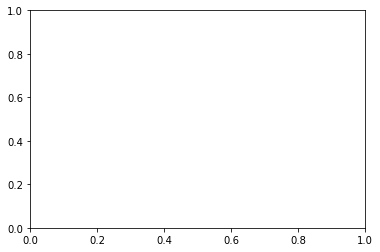

In [9]:
p = 1. * np.arange(len(data)) / (len(data)-1) # 计算各点的累计概率 F(x)
p = [1-i for i in p]                       # 计算概率的补 1-F(x)
x = np.log10(data)                         # logx
y = np.log10(p)                            # log(1-F(x))
plt.plot(x,y)
plt.show()

In [22]:
print(ETF_50.head())
print(ETF_50.tail())

            50ETF_Price
Date                   
2005-02-23         0.65
2005-02-24         0.65
2005-02-25         0.66
2005-02-28         0.65
2005-03-01         0.65
            50ETF_Price
Date                   
2022-06-24         2.98
2022-06-27         3.02
2022-06-28         3.04
2022-06-29         3.02
2022-06-30         3.07


In [23]:
print(ETFSH_300.head())
print(ETFSH_300.tail())

            300ETFSH_Price
Date                      
2012-05-28            2.24
2012-05-29            2.27
2012-05-30            2.26
2012-05-31            2.26
2012-06-01            2.26
            300ETFSH_Price
Date                      
2022-06-24            4.41
2022-06-27            4.46
2022-06-28            4.51
2022-06-29            4.46
2022-06-30            4.51


In [24]:
print(ETFSZ_300.head())
print(ETFSZ_300.tail())

            300ETFSZ_Price
Date                      
2012-05-28            2.21
2012-05-29            2.24
2012-05-30            2.23
2012-05-31            2.22
2012-06-01            2.23
            300ETFSZ_Price
Date                      
2022-06-24            4.41
2022-06-27            4.46
2022-06-28            4.51
2022-06-29            4.46
2022-06-30            4.52


In [170]:
#上证50ETF的投资期限
T1 = datetime.datetime(2005,2,23)
T2 = datetime.datetime(2022,6,30)
ETF_50_Year_Delta = (T2-T1).days/365
ETF_50_Year_Delta

17.35890410958904

In [100]:
#根据索引提取样本数据
ETF_50['50ETF_Price'].loc['2022-06-30']

3.07

In [174]:
#上证50ETF的总算术收益率，算术平均年化收益率
ETF_50_Return_Total_Ar = (ETF_50['50ETF_Price'][-1]-ETF_50['50ETF_Price'][0])/ETF_50['50ETF_Price'][0]
print('上证50ETF基金的总算术收益率是：',round(ETF_50_Return_Total_Ar,3))
ETF_50_Annual_Return_Total_Ar = ETF_50_Return_Total_Ar/ETF_50_Year_Delta
print('上证50ETF基金的算术平均年化收益率是：',round(ETF_50_Annual_Return_Total_Ar,3))

上证50ETF基金的总算术收益率是： 3.723
上证50ETF基金的算术平均年化收益率是： 0.214


In [175]:
#上证50ETF的总几何收益率（对数收益率），算术平均年化收益率
ETF_50_Return_Total_Gm = np.log(ETF_50['50ETF_Price'][-1]/ETF_50['50ETF_Price'][0])
print('上证50ETF基金的总几何收益率是：',round(ETF_50_Return_Total_Gm,3))
ETF_50_Annual_Return_Total_Gm = ETF_50_Return_Total_Gm/ETF_50_Year_Delta
print('上证50ETF基金的几何平均年化收益率是：',round(ETF_50_Annual_Return_Total_Gm,3))

上证50ETF基金的总几何收益率是： 1.552
上证50ETF基金的几何平均年化收益率是： 0.089


In [128]:
#上证&深证沪深300ETF投资时间期限
T1 = datetime.datetime(2012,5,28)
T2 = datetime.datetime(2022,6,30)
ETF_300_Year_Delta = (T2-T1).days/365
ETF_300_Year_Delta

10.095890410958905

In [184]:
#上证300ETF的总算术收益率，算术平均年化收益率
ETF_300SH_Return_Total_Ar = (ETFSH_300['300ETFSH_Price'][-1]-ETFSH_300['300ETFSH_Price'][0])/ETFSH_300['300ETFSH_Price'][0]
print('上证300ETF基金的总算术收益率是：',round(ETF_300SH_Return_Total_Ar,3))
ETF_300SH_Annual_Return_Total_Ar = ETF_300SH_Return_Total_Ar/ETF_300_Year_Delta
print('上证300ETF基金的算术平均年化收益率是：',round(ETF_300SH_Annual_Return_Total_Ar,3))

上证300ETF基金的总算术收益率是： 1.013
上证300ETF基金的算术平均年化收益率是： 0.1


In [186]:
#上证300ETF的总几何收益率（对数收益率），几何平均年化收益率
ETF_300SH_Return_Total_Gm = np.log(ETFSH_300['300ETFSH_Price'][-1]/ETFSH_300['300ETFSH_Price'][0])
print('上证300ETF基金的总几何收益率是：',round(ETF_300SH_Return_Total_Gm,3))
ETF_300SH_Annual_Return_Total_Gm = ETF_300SH_Return_Total_Gm/ETF_300_Year_Delta
print('上证300ETF基金的几何平均年化收益率是：',round(ETF_300SH_Annual_Return_Total_Gm,3))

上证300ETF基金的总几何收益率是： 0.7
上证300ETF基金的几何平均年化收益率是： 0.069


In [187]:
#深证300ETF的总算术收益率，算术平均年化收益率
ETF_300SZ_Return_Total_Ar = (ETFSZ_300['300ETFSZ_Price'][-1]-ETFSZ_300['300ETFSZ_Price'][0])/ETFSZ_300['300ETFSZ_Price'][0]
print('深证300ETF基金的总算术收益率是：',round(ETF_300SZ_Return_Total_Ar,3))
ETF_300SZ_Annual_Return_Total_Ar = ETF_300SZ_Return_Total_Ar/ETF_300_Year_Delta
print('深证300ETF基金的算术平均年化收益率是：',round(ETF_300SZ_Annual_Return_Total_Ar,3))

深证300ETF基金的总算术收益率是： 1.045
深证300ETF基金的算术平均年化收益率是： 0.104


In [188]:
#深证300ETF的总几何收益率（对数收益率），几何平均年化收益率
ETF_300SZ_Return_Total_Gm = np.log(ETFSZ_300['300ETFSZ_Price'][-1]/ETFSZ_300['300ETFSZ_Price'][0])
print('深证300ETF基金的总几何收益率是：',round(ETF_300SZ_Return_Total_Gm,3))
ETF_300SZ_Annual_Return_Total_Gm = ETF_300SZ_Return_Total_Gm/ETF_300_Year_Delta
print('深证300ETF基金的几何平均年化收益率是：',round(ETF_300SZ_Annual_Return_Total_Gm,3))

深证300ETF基金的总几何收益率是： 0.716
深证300ETF基金的几何平均年化收益率是： 0.071


In [65]:
#计算对数化后的价格
#ETF_50['Log_Price'] = np.log(ETF_50['50ETF_Price'])

In [11]:
#计算上证50ETF的每日算术收益率，几何收益率
ETF_50['Return_Ar'] = ETF_50['50ETF_Price'].pct_change()
ETF_50['Return_Gm'] = np.log(ETF_50['50ETF_Price']/ETF_50['50ETF_Price'].shift(1))

In [13]:
data = ETF_50['Return_Gm']
data.head()

Date
2005-02-23         NaN
2005-02-24    0.000000
2005-02-25    0.015267
2005-02-28   -0.015267
2005-03-01    0.000000
Name: Return_Gm, dtype: float64

In [135]:
ETF_50.describe()

,50ETF_Price,Return_Ar,Return_Gm
count,4220.000000,4219.000000,4219.000000
mean,2.014730,0.000516,0.000368
std,0.776295,0.017209,0.017218
min,0.530000,-0.102128,-0.107727
25%,1.460000,-0.007156,-0.007181
50%,1.950000,0.000000,0.000000
75%,2.630000,0.007812,0.007782
max,3.960000,0.103704,0.098672


In [177]:
#上证50ETF的每日算术收益率各阶矩：均值，标准差，方差，偏度，峰度
ETF_50_mean = ETF_50['Return_Ar'].mean()
ETF_50_std = ETF_50['Return_Ar'].std()
ETF_50_var = ETF_50['Return_Ar'].var()
ETF_50_skew = ETF_50['Return_Ar'].skew()
ETF_50_kurt= ETF_50['Return_Ar'].kurt()

print("ETF_50_Ar_mean:",ETF_50_mean)
print("ETF_50_Ar_std:",ETF_50_std)
print("ETF_50_Ar_var:",ETF_50_var)
print("ETF_50_Ar_skew:",ETF_50_skew)
print("ETF_50_Ar_kurt:",ETF_50_kurt)

ETF_50_Ar_mean: 0.0005161666817053249
ETF_50_Ar_std: 0.017208906058819175
ETF_50_Ar_var: 0.00029614644774126334
ETF_50_Ar_skew: -0.006696454088686466
ETF_50_Ar_kurt: 4.66457618295085


In [178]:
#上证50ETF的每日几何收益率各阶矩：均值，标准差，方差，偏度，峰度
ETF_50_mean = ETF_50['Return_Gm'].mean()
ETF_50_std = ETF_50['Return_Gm'].std()
ETF_50_var = ETF_50['Return_Gm'].var()
ETF_50_skew = ETF_50['Return_Gm'].skew()
ETF_50_kurt= ETF_50['Return_Gm'].kurt()

print("ETF_50_Gm_mean:",ETF_50_mean)
print("ETF_50_Gm_std:",ETF_50_std)
print("ETF_50_Gm_var:",ETF_50_var)
print("ETF_50_Gm_skew:",ETF_50_skew)
print("ETF_50_Gm_kurt:",ETF_50_kurt)

ETF_50_Gm_mean: 0.0003679688261890396
ETF_50_Gm_std: 0.017218286661175752
ETF_50_Gm_var: 0.0002964693955464228
ETF_50_Gm_skew: -0.17890695350014119
ETF_50_Gm_kurt: 4.724271829292398


In [193]:
#计算上证300ETF的每日算术收益率，几何收益率
ETFSH_300['Return_Ar'] = ETFSH_300['300ETFSH_Price'].pct_change()
ETFSH_300['Return_Gm'] = np.log(ETFSH_300['300ETFSH_Price']/ETFSH_300['300ETFSH_Price'].shift(1))

In [141]:
ETFSH_300.describe()

,300ETFSH_Price,Return_Ar,Return_Gm
count,2455.000000,2454.000000,2454.000000
mean,3.361882,0.000399,0.000285
std,0.962842,0.015035,0.015098
min,1.840000,-0.101227,-0.106725
25%,2.645000,-0.005938,-0.005955
50%,3.310000,0.000000,0.000000
75%,3.900000,0.006891,0.006867
max,5.720000,0.099359,0.094727


In [194]:
#上证300ETF的每日算术收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSH_300_mean = ETFSH_300['Return_Ar'].mean()
ETFSH_300_std = ETFSH_300['Return_Ar'].std()
ETFSH_300_var = ETFSH_300['Return_Ar'].var()
ETFSH_300_skew = ETFSH_300['Return_Ar'].skew()
ETFSH_300_kurt= ETFSH_300['Return_Ar'].kurt()

print("ETFSH_300_Ar_mean:",ETFSH_300_mean)
print("ETFSH_300_Ar_std:",ETFSH_300_std)
print("ETFSH_300_Ar_var:",ETFSH_300_var)
print("ETFSH_300_Ar_skew:",ETFSH_300_skew)
print("ETFSH_300_Ar_kurt:",ETFSH_300_kurt)

ETFSH_300_Ar_mean: 0.0003988116497432435
ETFSH_300_Ar_std: 0.015034751655264314
ETFSH_300_Ar_var: 0.00022604375733547305
ETFSH_300_Ar_skew: -0.46827331364207236
ETFSH_300_Ar_kurt: 7.848092633223086


In [195]:
#上证300ETF的每日几何收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSH_300_mean = ETFSH_300['Return_Gm'].mean()
ETFSH_300_std = ETFSH_300['Return_Gm'].std()
ETFSH_300_var = ETFSH_300['Return_Gm'].var()
ETFSH_300_skew = ETFSH_300['Return_Gm'].skew()
ETFSH_300_kurt= ETFSH_300['Return_Gm'].kurt()

print("ETFSH_300_Gm_mean:",ETFSH_300_mean)
print("ETFSH_300_Gm_std:",ETFSH_300_std)
print("ETFSH_300_Gm_var:",ETFSH_300_var)
print("ETFSH_300_Gm_skew:",ETFSH_300_skew)
print("ETFSH_300_Gm_kurt:",ETFSH_300_kurt)

ETFSH_300_Gm_mean: 0.0002851757488376676
ETFSH_300_Gm_std: 0.015098333699133186
ETFSH_300_Gm_var: 0.0002279596804903808
ETFSH_300_Gm_skew: -0.6893117830164269
ETFSH_300_Gm_kurt: 8.375806342342218


In [196]:
#计算深证300ETF的每日算术收益率，几何收益率
ETFSZ_300['Return_Ar'] = ETFSZ_300['300ETFSZ_Price'].pct_change()
ETFSZ_300['Return_Gm'] = np.log(ETFSZ_300['300ETFSZ_Price']/ETFSZ_300['300ETFSZ_Price'].shift(1))

In [145]:
ETFSZ_300.describe()

,300ETFSZ_Price,Return_Ar,Return_Gm
count,2455.000000,2454.000000,2454.000000
mean,3.343870,0.000406,0.000292
std,0.971333,0.015103,0.015176
min,1.810000,-0.101538,-0.107071
25%,2.630000,-0.005594,-0.005610
50%,3.290000,0.000000,0.000000
75%,3.880000,0.006467,0.006446
max,5.720000,0.100295,0.095578


In [197]:
#上证300ETF的每日算术收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSZ_300_mean = ETFSZ_300['Return_Ar'].mean()
ETFSZ_300_std = ETFSZ_300['Return_Ar'].std()
ETFSZ_300_var = ETFSZ_300['Return_Ar'].var()
ETFSZ_300_skew = ETFSZ_300['Return_Ar'].skew()
ETFSZ_300_kurt= ETFSZ_300['Return_Ar'].kurt()

print("ETFSZ_300_Ar_mean:",ETFSZ_300_mean)
print("ETFSZ_300_Ar_std:",ETFSZ_300_std)
print("ETFSZ_300_Ar_var:",ETFSZ_300_var)
print("ETFSZ_300_Ar_skew:",ETFSZ_300_skew)
print("ETFSZ_300_Ar_kurt:",ETFSZ_300_kurt)

ETFSZ_300_Ar_mean: 0.00040633342910036997
ETFSZ_300_Ar_std: 0.015103146898454448
ETFSZ_300_Ar_var: 0.0002281050462362942
ETFSZ_300_Ar_skew: -0.5262937937433655
ETFSZ_300_Ar_kurt: 9.142937291721832


In [198]:
#深证300ETF的每日几何收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSZ_300_mean = ETFSZ_300['Return_Gm'].mean()
ETFSZ_300_std = ETFSZ_300['Return_Gm'].std()
ETFSZ_300_var = ETFSZ_300['Return_Gm'].var()
ETFSZ_300_skew = ETFSZ_300['Return_Gm'].skew()
ETFSZ_300_kurt= ETFSZ_300['Return_Gm'].kurt()

print("ETFSZ_300_Gm_mean:",ETFSZ_300_mean)
print("ETFSZ_300_Gm_std:",ETFSZ_300_std)
print("ETFSZ_300_Gm_var:",ETFSZ_300_var)
print("ETFSZ_300_Gm_skew:",ETFSZ_300_skew)
print("ETFSZ_300_Gm_kurt:",ETFSZ_300_kurt)

ETFSZ_300_Gm_mean: 0.00029157272954950233
ETFSZ_300_Gm_std: 0.0151760401470207
ETFSZ_300_Gm_var: 0.00023031219454398404
ETFSZ_300_Gm_skew: -0.7776508419544912
ETFSZ_300_Gm_kurt: 9.82630835834541


Text(0.5, 1.0, 'Probplot for 50ETF')

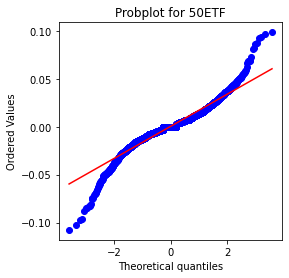

In [228]:
#50ETF每日收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETF_50 = ETF_50.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_Gm'],plot = ax)
ax.set_title("Probplot for 50ETF")

Text(0.5, 1.0, 'Probplot for 300ETFSH')

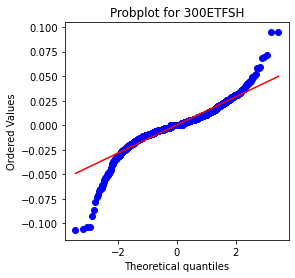

In [229]:
#上证300ETF每日收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETFSH_300 = ETFSH_300.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETFSH_300['Return_Gm'],plot = ax)
ax.set_title("Probplot for 300ETFSH")

Text(0.5, 1.0, 'Probplot for 300ETFSZ')

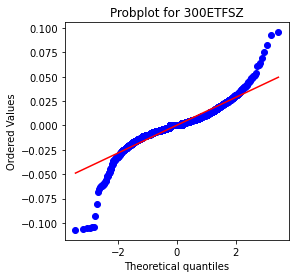

In [230]:
#深证300ETF每日收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETFSZ_300 = ETFSZ_300.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETFSZ_300['Return_Gm'],plot = ax)
ax.set_title("Probplot for 300ETFSZ")

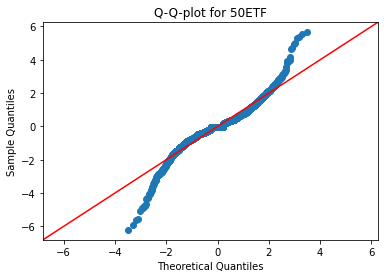

In [232]:
#50ETF每日收益率概率的QQ-plot。
sm.qqplot(ETF_50['Return_Gm'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for 50ETF")
plt.show()

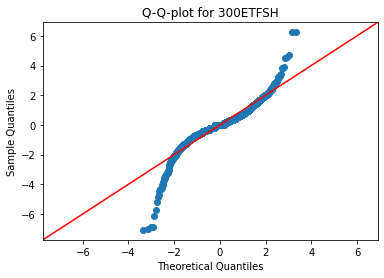

In [233]:
#上证300ETF每日收益率概率的QQ-plot。
import statsmodels.api as sm
sm.qqplot(ETFSH_300['Return_Gm'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for 300ETFSH")
plt.show()

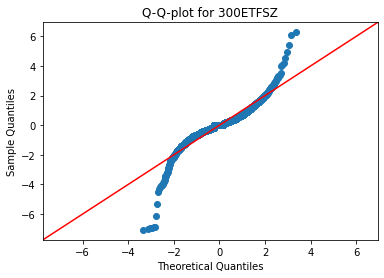

In [234]:
#深证300ETF每日收益率概率的QQ-plot。
sm.qqplot(ETFSZ_300['Return_Gm'],stats.norm, fit=True, line='45')
plt.title("Q-Q-plot for 300ETFSZ")
plt.show()

In [207]:
#滚动计算上证50ETF月度收益率，假设每个月20个交易日
ETF_50['Return_Monthly'] = ETF_50['Return_Gm'].rolling(window=20).sum()

In [208]:
#上证50ETF月度收益率各阶矩：均值，标准差，方差，偏度，峰度
ETF_50_mean_Monthly = ETF_50['Return_Monthly'].mean()
ETF_50_std_Monthly  = ETF_50['Return_Monthly'].std()
ETF_50_var_Monthly  = ETF_50['Return_Monthly'].var()
ETF_50_skew_Monthly  = ETF_50['Return_Monthly'].skew()
ETF_50_kurt_Monthly = ETF_50['Return_Monthly'].kurt()

print("ETF_50_mean_Monthly:",ETF_50_mean_Monthly)
print("ETF_50_std_Monthly:",ETF_50_std_Monthly)
print("ETF_50_var_Monthly:",ETF_50_var_Monthly)
print("ETF_50_skew_Monthly:",ETF_50_skew_Monthly)
print("ETF_50_kurt_Monthly:",ETF_50_kurt_Monthly)

ETF_50_mean_Monthly: 0.007264057891195686
ETF_50_std_Monthly: 0.07824985033116938
ETF_50_var_Monthly: 0.006123039076850408
ETF_50_skew_Monthly: -0.010977308331028801
ETF_50_kurt_Monthly: 1.5247618476790739


((array([-3.57573146, -3.33671686, -3.20479191, ...,  3.20479191,
          3.33671686,  3.57573146]),
  array([-0.35955541, -0.32874356, -0.31077779, ...,  0.3225509 ,
          0.3345783 ,  0.33930644])),
 (0.07862351647439814, 0.007473716212598983, 0.990524339405377))

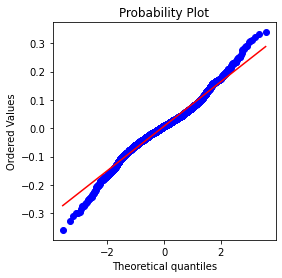

In [217]:
#50ETF月度收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETF_50 = ETF_50.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_Monthly'],plot = ax)

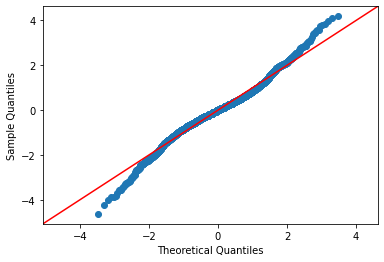

In [218]:
#50ETF月度收益率概率的QQ-plot。
sm.qqplot(ETF_50['Return_Monthly'],stats.norm, fit=True, line='45')
plt.show()

In [219]:
#滚动计算上证300ETF月度收益率，假设每个月20个交易日
ETFSH_300['Return_Monthly'] = ETFSH_300['Return_Gm'].rolling(window=20).sum()

/var/folders/_g/xwwb1f3d6dbc90p64q_54_xw0000gp/T/ipykernel_19649/2171984494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETFSH_300['Return_Monthly'] = ETFSH_300['Return_Gm'].rolling(window=20).sum()


In [220]:
#上证300ETF月度收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSH_300_mean_Monthly = ETFSH_300['Return_Monthly'].mean()
ETFSH_300_std_Monthly  = ETFSH_300['Return_Monthly'].std()
ETFSH_300_var_Monthly  = ETFSH_300['Return_Monthly'].var()
ETFSH_300_skew_Monthly  = ETFSH_300['Return_Monthly'].skew()
ETFSH_300_kurt_Monthly = ETFSH_300['Return_Monthly'].kurt()

print("ETFSH_300_mean_Monthly:",ETFSH_300_mean_Monthly)
print("ETFSH_300_std_Monthly:",ETFSH_300_std_Monthly)
print("ETFSH_300_var_Monthly:",ETFSH_300_var_Monthly)
print("ETFSH_300_skew_Monthly:",ETFSH_300_skew_Monthly)
print("ETFSH_300_kurt_Monthly:",ETFSH_300_kurt_Monthly)

ETFSH_300_mean_Monthly: 0.005468202389189849
ETFSH_300_std_Monthly: 0.06653255328698525
ETFSH_300_var_Monthly: 0.004426580646885532
ETFSH_300_skew_Monthly: -0.3205505757553427
ETFSH_300_kurt_Monthly: 3.091497337662266


((array([-3.44586292, -3.19844204, -3.06141229, ...,  3.06141229,
          3.19844204,  3.44586292]),
  array([-0.41820413, -0.32136494, -0.32107772, ...,  0.26826399,
          0.27338826,  0.27670501])),
 (0.06520669829010262, 0.005468202389189837, 0.979031059528745))

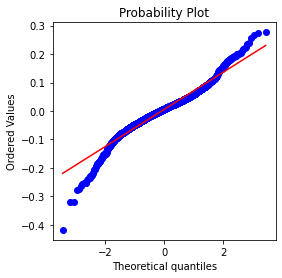

In [221]:
#上证300ETF月度收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETFSH_300 = ETFSH_300.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETFSH_300['Return_Monthly'],plot = ax)

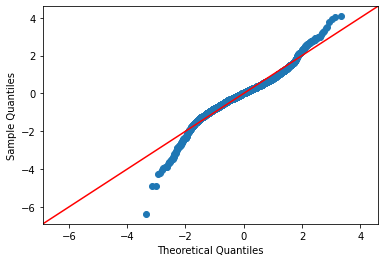

In [222]:
#上证300ETF月度收益率概率的QQ-plot。
sm.qqplot(ETFSH_300['Return_Monthly'],stats.norm, fit=True, line='45')
plt.show()

In [223]:
#滚动计算深证300ETF月度收益率，假设每个月20个交易日
ETFSZ_300['Return_Monthly'] = ETFSZ_300['Return_Gm'].rolling(window=20).sum()

In [224]:
#深证300ETF月度收益率各阶矩：均值，标准差，方差，偏度，峰度
ETFSZ_300_mean_Monthly = ETFSZ_300['Return_Monthly'].mean()
ETFSZ_300_std_Monthly  = ETFSZ_300['Return_Monthly'].std()
ETFSZ_300_var_Monthly  = ETFSZ_300['Return_Monthly'].var()
ETFSZ_300_skew_Monthly  = ETFSZ_300['Return_Monthly'].skew()
ETFSZ_300_kurt_Monthly = ETFSZ_300['Return_Monthly'].kurt()

print("ETFSZ_300_mean_Monthly:",ETFSZ_300_mean_Monthly)
print("ETFSZ_300_std_Monthly:",ETFSZ_300_std_Monthly)
print("ETFSZ_300_var_Monthly:",ETFSZ_300_var_Monthly)
print("ETFSZ_300_skew_Monthly:",ETFSZ_300_skew_Monthly)
print("ETFSZ_300_kurt_Monthly:",ETFSZ_300_kurt_Monthly)

ETFSZ_300_mean_Monthly: 0.005598284821654645
ETFSZ_300_std_Monthly: 0.06684802795939407
ETFSZ_300_var_Monthly: 0.004468658842059931
ETFSZ_300_skew_Monthly: -0.32515673840684606
ETFSZ_300_kurt_Monthly: 3.11149983508735


((array([-3.44586292, -3.19844204, -3.06141229, ...,  3.06141229,
          3.19844204,  3.44586292]),
  array([-0.42575411, -0.32673259, -0.32558436, ...,  0.27029033,
          0.27776464,  0.28216025])),
 (0.06551744912801276, 0.005598284821654629, 0.9790544148550432))

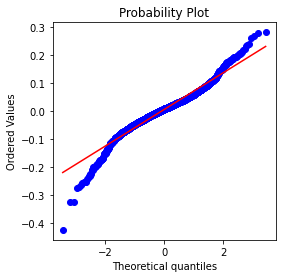

In [225]:
#深证300ETF月度收益率概率分布图，不是QQ-plot，因为未进行Quantile处理。
ETFSZ_300 = ETFSZ_300.dropna()#删除缺失值，否则红线不出来。
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETFSZ_300['Return_Monthly'],plot = ax)

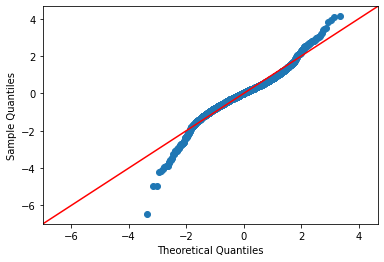

In [226]:
#深证300ETF月度收益率概率的QQ-plot。
sm.qqplot(ETFSZ_300['Return_Monthly'],stats.norm, fit=True, line='45')
plt.show()

# 以下为备用代码

<AxesSubplot:xlabel='Date'>

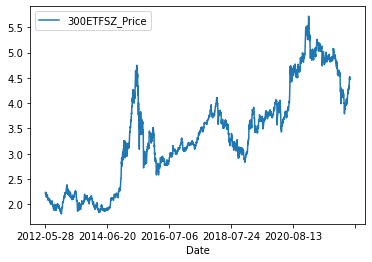

In [151]:
#价格行情折线图
ETFSZ_300[['300ETFSZ_Price']].plot()

<AxesSubplot:xlabel='Date'>

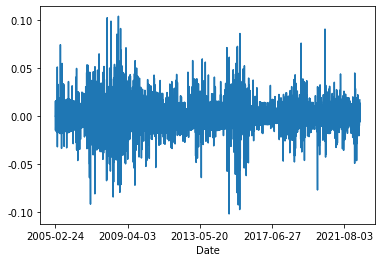

In [313]:
ETF_50['Return_Ar'].plot()

<AxesSubplot:xlabel='Date'>

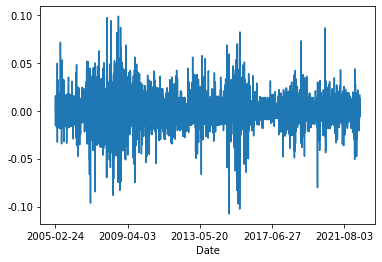

In [314]:
ETF_50['Return_Gm'].plot()

<AxesSubplot:xlabel='Date'>

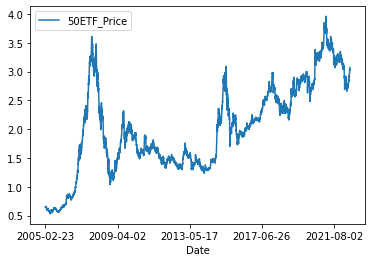

In [150]:
#价格行情折线图
ETF_50[['50ETF_Price']].plot()

<AxesSubplot:>

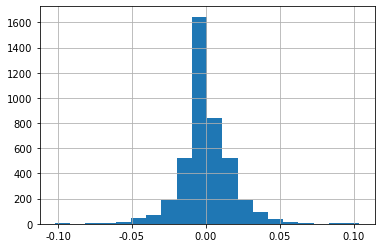

In [315]:
#50ETF每日算术收益率直方图
ETF_50['Return_Ar'].hist(bins=20)

<AxesSubplot:>

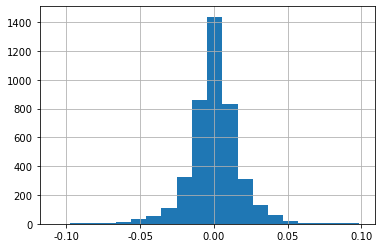

In [316]:
#50ETF每日几何收益率直方图
ETF_50['Return_Gm'].hist(bins=20)

/Users/tuyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Return_Ar', ylabel='Density'>

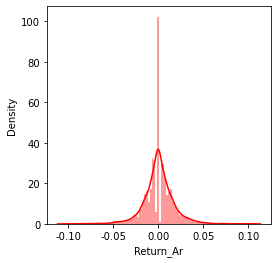

In [320]:
#50ETF每日收益率分布拟合
plt.figure(figsize =(4,4))
sns.distplot(ETF_50['Return_Ar'],bins=100,color='r',label='Return_Ar')

/Users/tuyuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


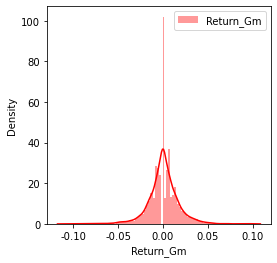

In [321]:
#50ETF每日收益率分布拟合
plt.figure(figsize =(4,4))
sns.distplot(ETF_50['Return_Gm'],bins=100,color='r',label='Return_Gm')
plt.legend()

In [322]:
#按样本数量分成N等份
ETF_50_cut = pd.cut(ETF_50['Return_Ar'],10)
ETF_50_cut.value_counts()

(-0.0198, 0.000788]    2164
(0.000788, 0.0214]     1358
(0.0214, 0.042]         285
(-0.0404, -0.0198]      262
(-0.061, -0.0404]        60
(0.042, 0.0625]          53
(-0.0815, -0.061]        16
(0.0625, 0.0831]          8
(0.0831, 0.104]           8
(-0.102, -0.0815]         5
Name: Return_Ar, dtype: int64

In [323]:
ETF_50_cut = pd.cut(ETF_50['Return_Gm'],10)
ETF_50_cut.value_counts()

(-0.00453, 0.0161]     2272
(-0.0252, -0.00453]    1185
(0.0161, 0.0368]        437
(-0.0458, -0.0252]      166
(0.0368, 0.0574]         80
(-0.0664, -0.0458]       41
(-0.0871, -0.0664]       14
(0.0574, 0.078]          11
(0.078, 0.0987]           8
(-0.108, -0.0871]         5
Name: Return_Gm, dtype: int64

In [326]:
# dropna未能删除缺失值，待求解
#ETF_50['Return_Monthly'] = ETF_50['Return_Monthly'].dropna()

Date
2005-03-23   -0.080043
2005-03-24   -0.080043
2005-03-25   -0.095310
2005-03-28   -0.080043
2005-03-29   -0.080043
                ...   
2022-06-24    0.087622
2022-06-27    0.097299
2022-06-28    0.096627
2022-06-29    0.079215
2022-06-30    0.099227
Name: Return_Monthly, Length: 4200, dtype: float64

In [211]:
#滚动计算2个月收益率，假设每个月20个交易日
ETF_50['Return_TwoMonthly'] = ETF_50['Return_Gm'].rolling(window=40).sum()

In [210]:
#滚动计算季度收益率，假设每个月20个交易日
ETF_50['Return_Quarterly'] = ETF_50['Return_Gm'].rolling(window=60).sum()

In [209]:
#滚动计算年化收益率，假设年250交易日
ETF_50['Return_Annually'] = ETF_50['Return_Gm'].rolling(window=250).sum()

In [331]:
#季度收益率各阶矩：均值，标准差，方差，偏度，峰度
ETF_50_mean_Quarterly = ETF_50['Return_Quarterly'].mean()
ETF_50_std_Quarterly  = ETF_50['Return_Quarterly'].std()
ETF_50_var_Quarterly  = ETF_50['Return_Quarterly'].var()
ETF_50_skew_Quarterly  = ETF_50['Return_Quarterly'].skew()
ETF_50_kurt_Quarterly = ETF_50['Return_Quarterly'].kurt()

print("ETF_50_mean_Quarterly:",ETF_50_mean_Quarterly)
print("ETF_50_std_Quarterly:",ETF_50_std_Quarterly)
print("ETF_50_var_Quarterly:",ETF_50_var_Quarterly)
print("ETF_50_skew_Quarterly:",ETF_50_skew_Quarterly)
print("ETF_50_kurt_Quarterly:",ETF_50_kurt_Quarterly)

ETF_50_mean_Quarterly: 0.02221032198766655
ETF_50_std_Quarterly: 0.15346477650146462
ETF_50_var_Quarterly: 0.023551437626644488
ETF_50_skew_Quarterly: 0.2315597244550018
ETF_50_kurt_Quarterly: 1.199022043010609


In [212]:
#年度几何收益率各阶矩：均值，标准差，方差，偏度，峰度
ETF_50_mean_Annually = ETF_50['Return_Annually'].mean()
ETF_50_std_Annually  = ETF_50['Return_Annually'].std()
ETF_50_var_Annually = ETF_50['Return_Annually'].var()
ETF_50_skew_Annually  = ETF_50['Return_Annually'].skew()
ETF_50_kurt_Annually = ETF_50['Return_Annually'].kurt()

print("ETF_50_mean_Annually:",ETF_50_mean_Annually)
print("ETF_50_std_Annually:",ETF_50_std_Annually)
print("ETF_50_var_Annually:",ETF_50_var_Annually)
print("ETF_50_skew_Annually:",ETF_50_skew_Annually)
print("ETF_50_kurt_Annually:",ETF_50_kurt_Annually)

ETF_50_mean_Annually: 0.10315261604710371
ETF_50_std_Annually: 0.3938531789244054
ETF_50_var_Annually: 0.1551203265488597
ETF_50_skew_Annually: 0.514333183181357
ETF_50_kurt_Annually: 1.9995916180657738


<AxesSubplot:>

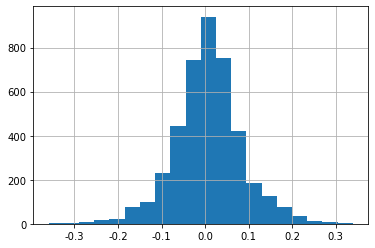

In [333]:
ETF_50['Return_Monthly'].hist(bins=20)

<AxesSubplot:>

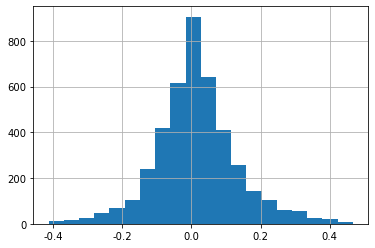

In [334]:
ETF_50['Return_TwoMonthly'].hist(bins=20)

<AxesSubplot:>

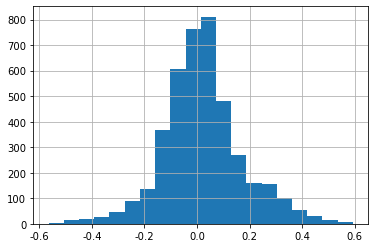

In [335]:
ETF_50['Return_Quarterly'].dropna()
ETF_50['Return_Quarterly'].hist(bins=20)

<AxesSubplot:>

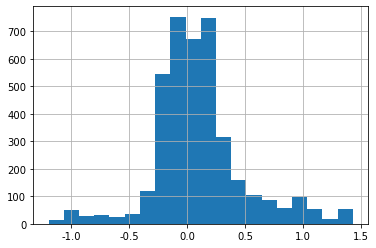

In [336]:
ETF_50['Return_Annually'].dropna()
ETF_50['Return_Annually'].hist(bins=20)

In [337]:
#分位数：
ETF_50['Return_Monthly'].quantile([0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

0.00   -0.359555
0.05   -0.120377
0.10   -0.083142
0.20   -0.048211
0.30   -0.025585
0.40   -0.008584
0.50    0.007340
0.60    0.022900
0.70    0.039531
0.80    0.061097
0.90    0.098440
0.95    0.143152
1.00    0.339306
Name: Return_Monthly, dtype: float64

((array([-3.59167721, -3.35365637, -3.22233171, ...,  3.22233171,
          3.35365637,  3.59167721]),
  array([-0.35955541, -0.32874356, -0.31077779, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

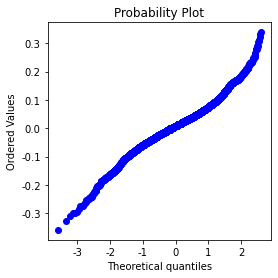

In [338]:
#50ETF月度收益率QQ-Plot图
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_Monthly'],plot = ax)

((array([-3.59167721, -3.35365637, -3.22233171, ...,  3.22233171,
          3.35365637,  3.59167721]),
  array([-0.41327765, -0.41185491, -0.40838482, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

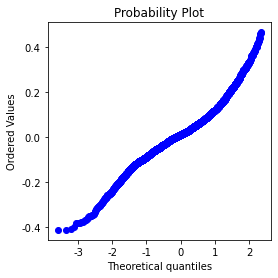

In [339]:
#50ETF双月度收益率QQ-Plot图
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_TwoMonthly'],plot = ax)

((array([-3.59167721, -3.35365637, -3.22233171, ...,  3.22233171,
          3.35365637,  3.59167721]),
  array([-0.56509525, -0.52951776, -0.52716204, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

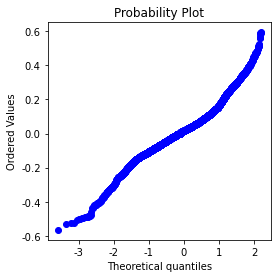

In [340]:
#50ETF季度收益率QQ-Plot图
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_Quarterly'],plot = ax)

((array([-3.59167721, -3.35365637, -3.22233171, ...,  3.22233171,
          3.35365637,  3.59167721]),
  array([-1.19333955, -1.17071558, -1.17007125, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

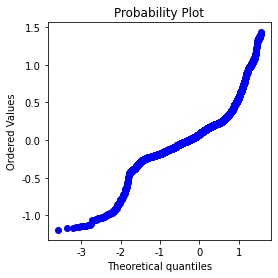

In [341]:
#50ETF年度收益率QQ-Plot图
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(ETF_50['Return_Annually'],dist = "norm" ,plot = ax)